## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

 - Pandas is used loading and viewing our dataset, also to process, clean and manipulate dataset.
 - Seaborn and Matplotlib to plot and visualize dataset.
 - Sklearn to call / implement any of Machine learning model we want to assign.

## Load Dataset

In [3]:
Flight = pd.read_csv('flight.csv')
pd.set_option('display.max_columns', None)
Flight.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,92,313338,112364.0,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,101,248864,120500.0,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,73,301864,82440.0,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,NaN,FR,50.0,3/31/2014,56,262958,72596.0,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,64,204855,85258.0,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16


## Dataset Profiling

In [5]:
print("Dataset dimension :", Flight.ndim)
print("Dataset shape :", Flight.shape)
print("Dataset size :", Flight.size)

Dataset dimension : 2
Dataset shape : (62988, 23)
Dataset size : 1448724


 - Dataset is in 2 dimensions, comprises total of 62988 observations (rows) and 23 features (columns), multiplying the two numbers, we have a total 1448724 number of elements of our dataset.

In [6]:
Flight_types = Flight.dtypes.reset_index()
Flight_types.columns = ['Features','Data Type']
Flight_types

,Features,Data Type
0,MEMBER_NO,int64
1,FFP_DATE,object
2,FIRST_FLIGHT_DATE,object
3,GENDER,object
4,FFP_TIER,int64
5,WORK_CITY,object
6,WORK_PROVINCE,object
7,WORK_COUNTRY,object
8,AGE,float64
9,LOAD_TIME,object


## Dataset Inspection

### Missing and Blank Value Checking

In [7]:
missing_data = Flight.isnull().sum().reset_index()
missing_data.columns = ['Features','Missing Values']
blank_data = Flight.apply(lambda x : x == '.').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(missing_data, blank_data, on=['Features'])
merged_data['Filling Factor'] = (Flight.shape[0]-missing_data['Missing Values'] + Flight.shape[0]-blank_data['Blank Values'])/Flight.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending=True)

,Features,Missing Values,Blank Values,Filling Factor
6,WORK_PROVINCE,3248,930,96.683495
5,WORK_CITY,2269,667,97.669397
12,SUM_YR_1,551,0,99.562615
8,AGE,420,0,99.666603
13,SUM_YR_2,138,0,99.890455
7,WORK_COUNTRY,26,0,99.979361
3,GENDER,3,0,99.997619
0,MEMBER_NO,0,0,100.000000
20,avg_discount,0,0,100.000000
19,EXCHANGE_COUNT,0,0,100.000000


 - 7 of the features contains missing values, they are Work_Province, Work_City, Sum_Yr_1, Age, Sum_Yr_2, Work_Country and Gender.
 - Notably there are  features with blank values (dot filled) Work_City and Work_Province.
 - Data needs to be cleaned first.

### Data Duplication Checking

In [8]:
Flight.duplicated().sum()

0

 - No duplication datas in dataset.

## Data Cleaning

### Work City + Work Province Missing and Blank Value Handling

In [9]:
WC_value = Flight['WORK_CITY'].value_counts().reset_index()
WC_value.columns = ['City','Total']
WC_value

,City,Total
0,guangzhou,9386
1,beijing,7845
2,shanghai,5001
3,shenzhen,3605
4,dalian,1979
...,...,...
3229,wujiaqu,1
3230,MARINA DEL REY LA,1
3231,wangcheng,1
3232,ULSAN-SI,1


In [10]:
WP_value = Flight['WORK_PROVINCE'].value_counts().reset_index()
WP_value.columns = ['Province','Total']
WP_value

,Province,Total
0,guangdong,17509
1,beijing,8014
2,shanghai,4998
3,liaoning,4182
4,xinjiang,2512
...,...,...
1160,YAMAGUCHI,1
1161,guang dong,1
1162,DF,1
1163,EUNPYENG-GU,1


 - Both WORK_CITY and WORK_PROVINCE have missing and blank (dot filled) values. First we need to replace the NaN value to dot (.), afterwards the dots will then replaced again by the value which is the most frequent for each feature. 

In [11]:
# Replacing Nan to dot
Flight['WORK_CITY'] = Flight['WORK_CITY'].fillna(value='.')
Flight['WORK_PROVINCE'] = Flight['WORK_PROVINCE'].fillna(value='.')

# Replacing the dots to value which at most frequent for each feature
Flight['WORK_CITY'] = Flight['WORK_CITY'].replace(['.'],['guangzhou'])
Flight['WORK_PROVINCE'] = Flight['WORK_PROVINCE'].replace(['.'],['guangdong'])

# Double Checking Missing and Blank values
WC_fill = Flight['WORK_CITY'].isnull().sum()
WC_blnk = Flight['WORK_CITY'].apply(lambda x : x == '.').sum()
WP_fill = Flight['WORK_PROVINCE'].isnull().sum()
WP_blnk = Flight['WORK_PROVINCE'].apply(lambda x : x == '.').sum()

print('Work City missing value:', WC_fill , 'and blank value :', WC_blnk)
print('Work Province missing value:', WP_fill ,'and blank value :', WP_blnk)

Work City missing value: 0 and blank value : 0
Work Province missing value: 0 and blank value : 0


### Work Country Missing Value Handling

In [12]:
WCou_value = Flight['WORK_COUNTRY'].value_counts().reset_index()
WCou_value.columns = ['Country','Total']
WCou_value

,Country,Total
0,CN,57748
1,HK,991
2,JP,875
3,KR,790
4,US,575
...,...,...
113,EC,1
114,RU,1
115,NO,1
116,YE,1


In [13]:
# Replacing Nan to the value at most frequent of the feature
Flight['WORK_COUNTRY'] = Flight['WORK_CITY'].fillna(value='CN')

# Double Checking Missing value
WCou_fill = Flight['WORK_COUNTRY'].isnull().sum()

print('Work Country missing value:', WCou_fill)

Work Country missing value: 0


### Gender Missing Value Handling

In [14]:
gender_value = Flight['GENDER'].value_counts().reset_index()
gender_value.columns = ['Gender','Total']
gender_value

,Gender,Total
0,Male,48134
1,Female,14851


In [15]:
# Replacing Nan to the value at most frequent of the feature
Flight['GENDER'] = Flight['GENDER'].fillna(value='Male')

# Double Checking Missing value
gender_fill = Flight['GENDER'].isnull().sum()

print('Gender missing value:', gender_fill)

Gender missing value: 0


### Sum YR 1, Sum YR 2 and Age Missing Value Handling

In [16]:
# Replacing Nan value to median value for each feature
median_YR1 = Flight['SUM_YR_1'].median()
median_YR2 = Flight['SUM_YR_2'].median()
median_Age = Flight['AGE'].median()
Flight['SUM_YR_1'] = Flight['SUM_YR_1'].fillna(value=median_YR1)
Flight['SUM_YR_2'] = Flight['SUM_YR_2'].fillna(value=median_YR2)
Flight['AGE'] = Flight['AGE'].fillna(value=median_Age)

# Double Checking Missing value
YR1_fill = Flight['SUM_YR_1'].isnull().sum()
YR2_fill = Flight['SUM_YR_2'].isnull().sum()
Age_fill = Flight['AGE'].isnull().sum()

print('Sum YR 1 missing value:', YR1_fill)
print('Sum YR 2 missing value:', YR2_fill)
print('Age missing value:', Age_fill)

Sum YR 1 missing value: 0
Sum YR 2 missing value: 0
Age missing value: 0


### Cross Checking Missing and Blank Value

In [16]:
missing_datas = Flight.isnull().sum().reset_index()
missing_datas.columns = ['Features','Missing Values']
blank_datas = Flight.apply(lambda x : x == '.').sum().reset_index()
blank_datas.columns = ['Features','Blank Values']
filled_data = pd.merge(missing_datas, blank_datas, on=['Features'])
filled_data['Filling Factor'] = (Flight.shape[0]-missing_datas['Missing Values'] + Flight.shape[0]-blank_datas['Blank Values'])/Flight.shape[0]*50
filled_data.sort_values(by='Filling Factor',ascending=True)

,Features,Missing Values,Blank Values,Filling Factor
0,MEMBER_NO,0,0,100.0
20,avg_discount,0,0,100.0
19,EXCHANGE_COUNT,0,0,100.0
18,MAX_INTERVAL,0,0,100.0
17,AVG_INTERVAL,0,0,100.0
16,LAST_TO_END,0,0,100.0
15,LAST_FLIGHT_DATE,0,0,100.0
14,SEG_KM_SUM,0,0,100.0
13,SUM_YR_2,0,0,100.0
12,SUM_YR_1,0,0,100.0


 - Dataset is fully cleaned. 

### Basic Data Statistics

In [17]:
Flight.drop(['MEMBER_NO'],axis=1,inplace=True)
Flight.head(8)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,11/2/2006,12/24/2008,Male,6,guangzhou,beijing,guangzhou,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,2/19/2007,8/3/2007,Male,6,guangzhou,beijing,guangzhou,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,2/1/2007,8/30/2007,Male,6,guangzhou,beijing,guangzhou,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,Los Angeles,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,guiyang,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,guangzhou,64.0,3/31/2014,92,313338,112364.0,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,wulumuqishi,46.0,3/31/2014,101,248864,120500.0,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,wenzhoushi,50.0,3/31/2014,73,301864,82440.0,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14


In [18]:
Flight.describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.466502,11.839414,10925.081254,5333.022406,5597.823538,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.853632,14.049471,16339.486151,8077.407958,8694.832417,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1020.000000,785.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6524.250000,6826.250000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


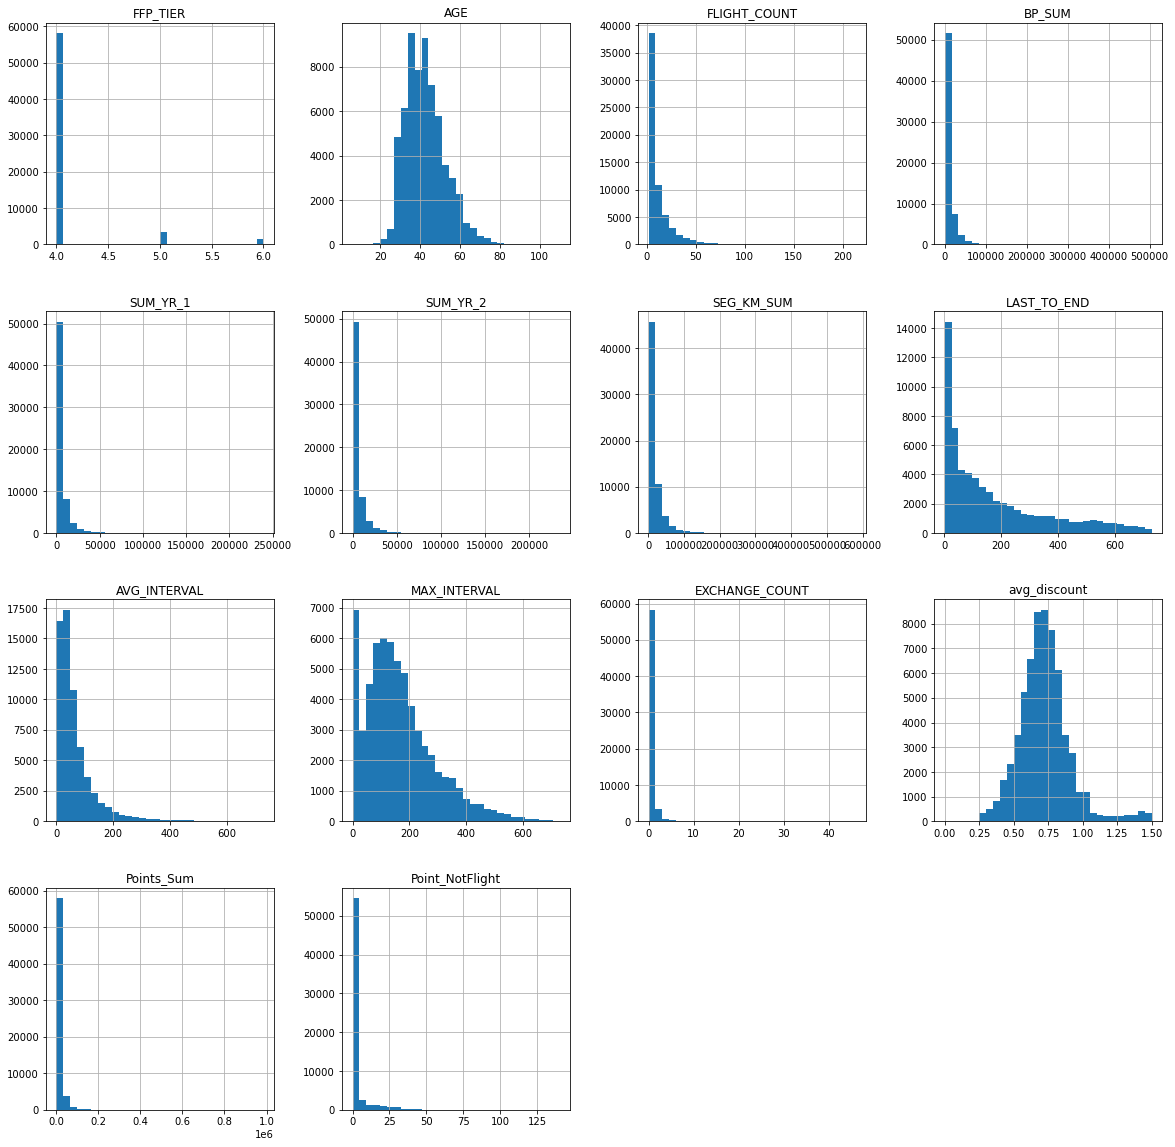

In [19]:
%matplotlib inline
Flight.hist(bins=30, figsize=(20,20))
plt.show()

 - Majority of the features are positively-skewed, in the eception for avg_discount and Age which are seemingly have a normal shaped distribution.

### Outliers Checking

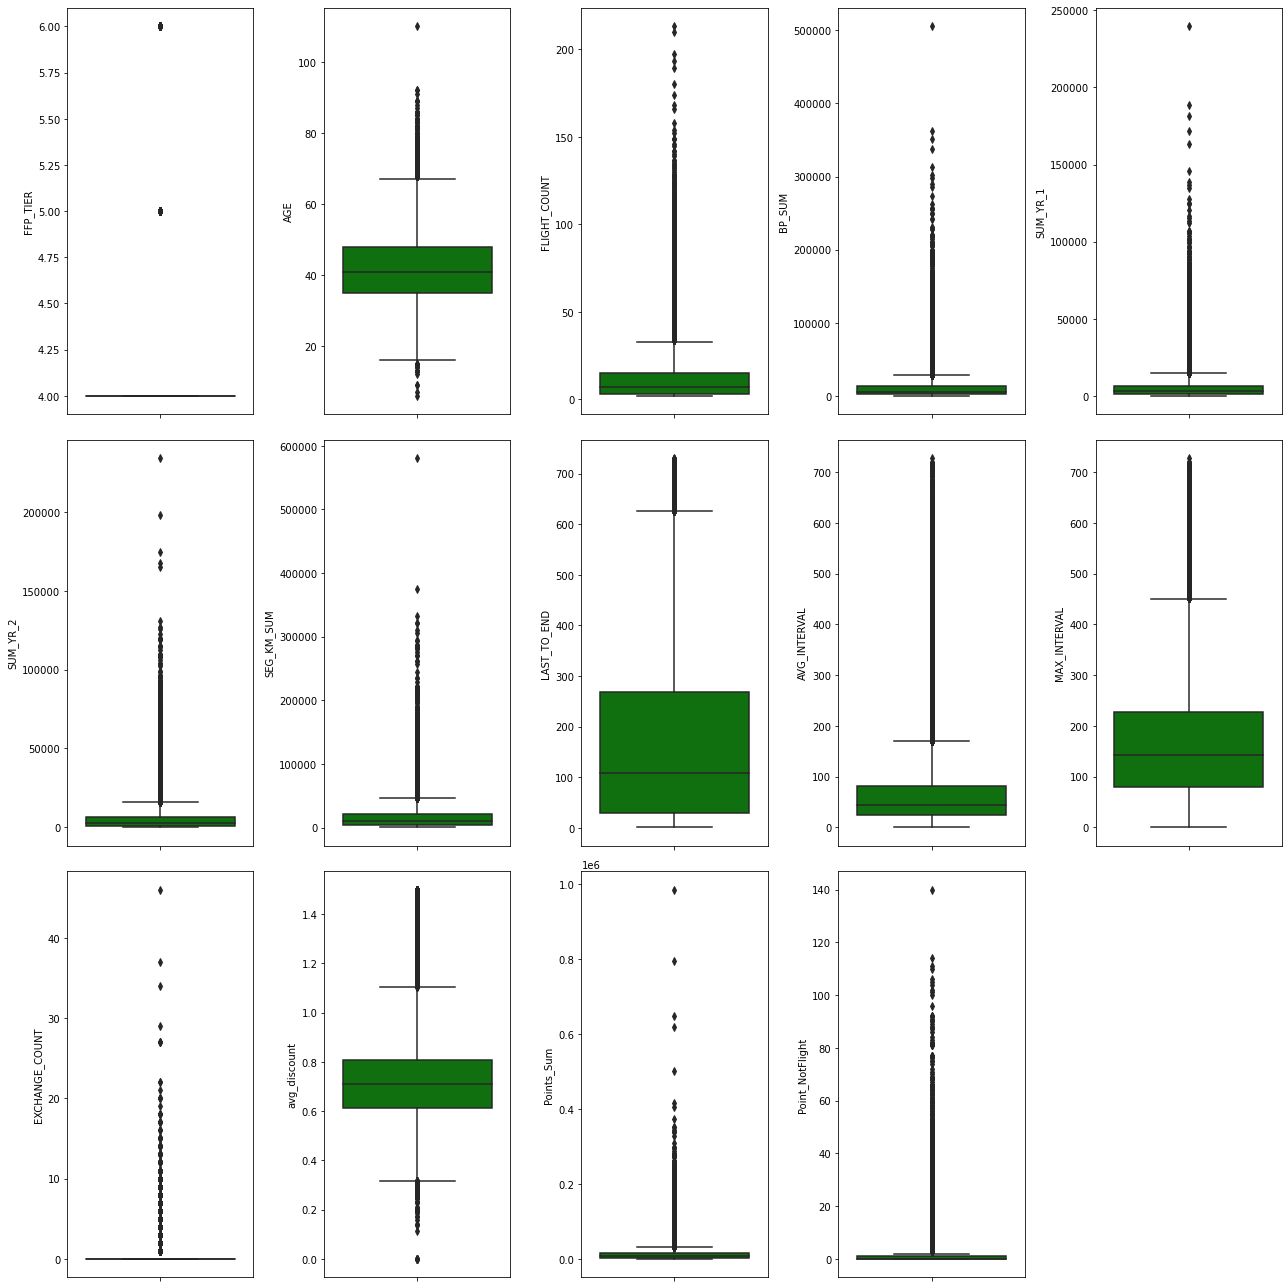

In [20]:
num = Flight[['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2',
             'SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT',
             'avg_discount','Points_Sum','Point_NotFlight']]
feat_num = list(num)

plt.figure(figsize=(18, 18))
for i in range(0, len(feat_num)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=Flight[feat_num[i]],color='green',orient='v')
    plt.tight_layout()

### Correlation Matrix

<AxesSubplot:>

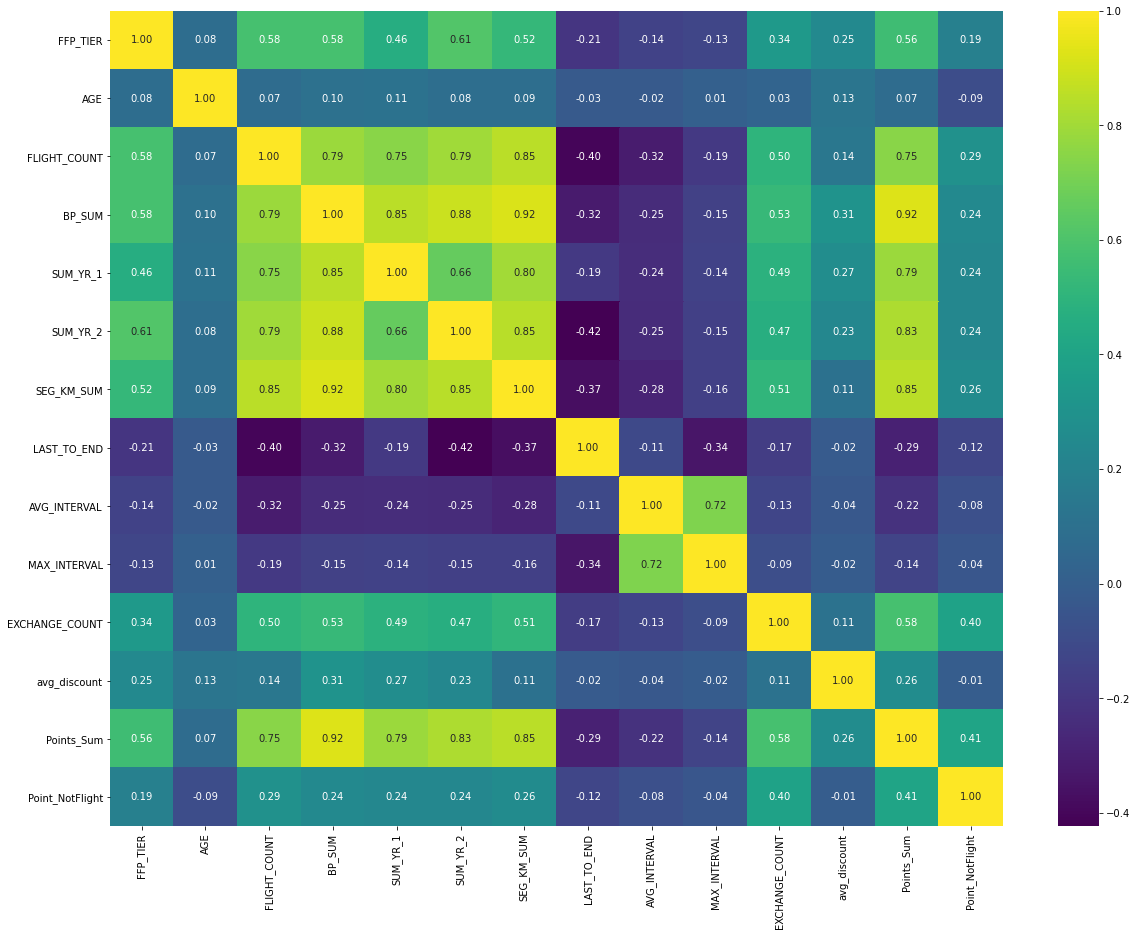

In [21]:
corr_= Flight.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "viridis")

## Prepare Datat for Clustering 

### Feature Selection

 - KMeans algorithm can only accept numerical value, then for this clustering process we will use all the numerical features available in dataset.

In [22]:
num = Flight[['FFP_TIER','AGE','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2',
             'SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT',
             'avg_discount','Points_Sum','Point_NotFlight']]
feat_num = list(num)

### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
num_std = std.fit_transform(num.astype(float))

# New Dataframe
Flight_std = pd.DataFrame(data=num_std, columns=list(num))
Flight_std.head(5)

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,5.076427,-1.163692,14.104600,30.257184,28.998020,26.290557,26.888115,-0.952668,-0.829061,-1.199663,29.648208,1.294761,29.609151,6.419225
1,5.076427,-0.047343,9.122166,21.515836,20.569878,18.613063,13.193949,-0.920027,-0.806989,-1.207767,25.246781,2.862377,19.662036,4.110730
2,5.076427,-0.250316,8.766278,20.822969,19.596167,18.331054,12.718487,-0.898267,-0.805644,-1.199663,17.324213,2.875110,19.203329,3.160173
3,2.401579,2.185353,0.794384,19.975629,13.744243,13.790160,12.605132,-0.430420,-0.514545,-0.753945,9.401645,1.991703,17.537756,1.259059
4,5.076427,0.561574,9.976297,16.091143,14.760666,14.388451,13.969210,-0.930907,-0.812228,-0.964648,23.486211,1.343400,15.909534,4.925493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,-0.273269,-1.772609,-0.700346,-0.668636,-0.660245,-0.643816,-0.762851,0.657597,-0.822395,-1.313119,0.598792,-3.891369,-0.011107,2.616998
62984,-0.273269,-0.453288,-0.557991,-0.668636,-0.660245,-0.643816,-0.434522,-0.473940,-0.396683,-0.859296,12.042501,-3.891369,4.604438,5.468668
62985,-0.273269,0.054143,-0.700346,-0.668636,-0.660245,-0.643816,-0.693197,-0.800345,1.267463,-0.000275,-0.281493,-3.891369,-0.611761,-0.370467
62986,-0.273269,-0.656261,-0.700346,-0.668636,-0.660245,-0.643816,-0.629268,1.217925,-0.719192,-1.248287,-0.281493,-3.891369,-0.611761,-0.370467


### KMeans Algorithm

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(Flight_std)

# Update KMeans label for dataset
Flight_std['clusters'] = kmeans.labels_
Flight_std.head(10)

Flight['clusters'] = kmeans.labels_
Flight

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
0,11/2/2006,12/24/2008,Male,6,guangzhou,beijing,guangzhou,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50,1
1,2/19/2007,8/3/2007,Male,6,guangzhou,beijing,guangzhou,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33,1
2,2/1/2007,8/30/2007,Male,6,guangzhou,beijing,guangzhou,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26,1
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,Los Angeles,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12,1
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,guiyang,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,guangzhou,25.0,3/31/2014,2,0,0.0,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22,0
62984,3/8/2010,9/14/2013,Male,4,foshan,guangdong,foshan,38.0,3/31/2014,4,0,0.0,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43,4
62985,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,guangzhou,43.0,3/31/2014,2,0,0.0,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0,2
62986,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,guangzhou,36.0,3/31/2014,2,0,0.0,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0,0


### Evaluation 

<AxesSubplot:>

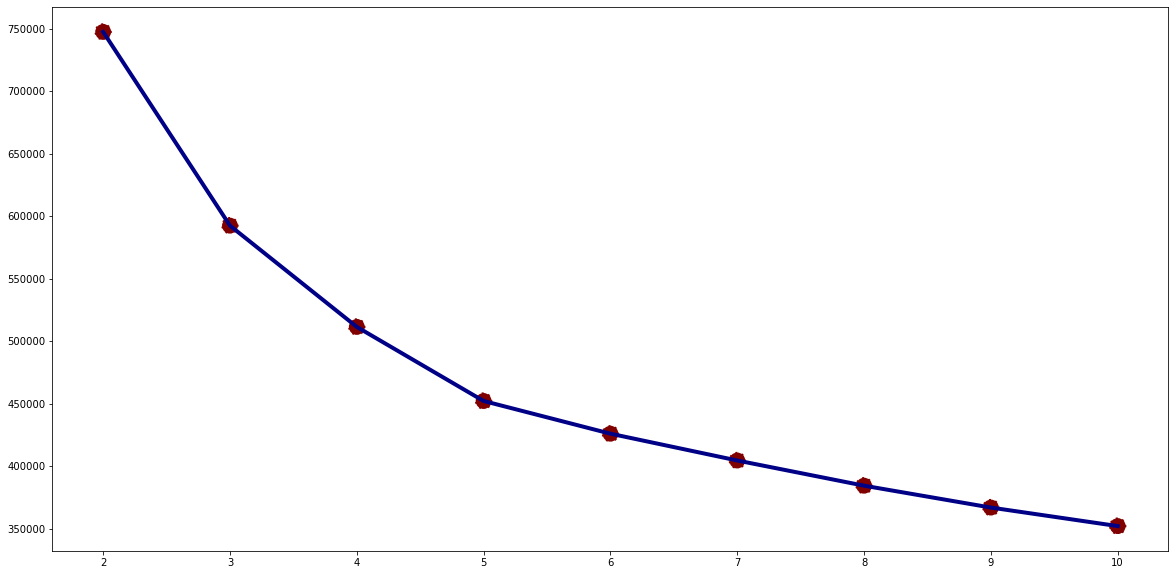

In [40]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(Flight_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


 - It can be seen 5 different culsters are the optimumm number of cluster for this dataset. The slope difference between 4 and 5 are larger than any other.
 - Our first assumption of 5 clusters are correct.

### Locating for Each Cluster Lables in Dataset

In [45]:
# Making filter for each cluster labels
filt1 = Flight['clusters'] == 0
filt2 = Flight['clusters'] == 1
filt3 = Flight['clusters'] == 2
filt4 = Flight['clusters'] == 3
filt5 = Flight['clusters'] == 4
filt6 = Flight['clusters'] == 5

In [37]:
# Locating CLuster label 0
Flight.loc[filt1].head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
3226,3/30/2005,5/3/2005,Male,4,FREMONT,guangdong,FREMONT,57.0,3/31/2014,9,28652,17809.0,0.0,55729,10/14/2012,535,22.750000,43,1,0.760647,28652,1,0
4087,4/22/2011,5/4/2011,Male,4,PALOS VERDES ESTATE,guangdong,PALOS VERDES ESTATE,52.0,3/31/2014,4,45863,19560.0,0.0,36880,7/17/2012,624,27.666667,79,0,1.029850,46663,1,0
4126,2/3/2011,7/17/2011,Female,4,LOS ANGELES,CA,LOS ANGELES,28.0,3/31/2014,3,45363,18900.0,0.0,36696,6/4/2012,667,12.500000,17,0,1.030000,45363,0,0
4129,5/2/2012,5/2/2012,Male,4,PLOENIX,AZ,PLOENIX,31.0,3/31/2014,3,45363,18900.0,0.0,36696,7/24/2012,617,41.500000,78,0,1.030000,45363,0,0
4644,9/16/2007,7/20/2012,Female,4,GARDENA,CA,GARDENA,47.0,3/31/2014,4,32568,12820.0,0.0,48928,10/18/2012,531,30.000000,44,0,0.725000,32568,0,0


In [38]:
# Locating CLuster label 1
Flight.loc[filt2].head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
0,11/2/2006,12/24/2008,Male,6,guangzhou,beijing,guangzhou,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50,1
1,2/19/2007,8/3/2007,Male,6,guangzhou,beijing,guangzhou,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33,1
2,2/1/2007,8/30/2007,Male,6,guangzhou,beijing,guangzhou,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26,1
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,Los Angeles,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12,1
4,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,guiyang,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39,1


In [41]:
# Locating CLuster label 2
Flight.loc[filt3].head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
4125,7/9/2012,8/6/2012,Female,4,ARCADIA,CA,ARCADIA,31.0,3/31/2014,3,43037,6300.0,14400.0,36696,3/9/2014,23,290.50,511,0,1.030000,43037,0,2
4128,3/20/2011,3/1/2012,Male,4,guangzhou,guangdong,guangzhou,54.0,3/31/2014,3,45363,12600.0,7200.0,36696,12/16/2013,107,296.50,427,0,1.030000,45363,0,2
4814,4/29/2012,5/1/2012,Female,4,guangzhou,guangdong,guangzhou,53.0,3/31/2014,5,35595,5750.0,11962.0,41852,3/8/2014,24,169.25,466,0,0.831874,35595,0,2
4899,4/4/2007,8/26/2007,Male,4,ALHAMBRA,CA,ALHAMBRA,46.0,3/31/2014,4,18608,5700.0,5700.0,48928,6/12/2013,294,126.00,353,0,0.705000,18608,0,2
4933,12/26/2010,12/29/2010,Male,4,COVINA,CALIFORNIA,COVINA,20.0,3/31/2014,3,34894,3200.0,12600.0,36696,8/12/2013,233,210.00,415,0,0.936667,34894,0,2


In [42]:
# Locating CLuster label 3
Flight.loc[filt4].head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
1448,3/9/2013,3/9/2013,Female,4,guangzhou,guangdong,guangzhou,43.0,3/31/2014,8,13956,6720.0,14257.0,86723,3/9/2014,23,52.285714,208,0,0.698259,13956,0,3
1839,6/22/2012,7/4/2012,Male,4,guangzhou,guangdong,guangzhou,53.0,3/31/2014,6,27912,12800.0,5900.0,73392,1/11/2014,81,111.200000,226,0,0.745000,27912,0,3
1970,5/15/2008,5/15/2008,Male,4,guangzhou,guangdong,guangzhou,60.0,3/31/2014,6,27912,6400.0,11200.0,73392,1/2/2014,90,92.400000,178,0,0.723333,27912,0,3
2215,12/4/2011,12/4/2011,Male,4,dongguan,guangdong,dongguan,66.0,3/31/2014,6,27912,11350.0,5700.0,73392,9/12/2013,202,98.000000,173,0,0.686667,27912,0,3
2271,12/27/2007,12/27/2007,Male,4,guangzhou,guangdong,guangzhou,49.0,3/31/2014,12,29209,7414.0,6578.0,75349,11/23/2013,130,36.090909,203,0,0.661214,29209,0,3


In [43]:
# Locating CLuster label 4
Flight.loc[filt5].head()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
305,12/28/2007,11/8/2008,Male,5,shantou,guangdong,shantou,40.0,3/31/2014,27,77236,19156.0,20112.0,164336,2/5/2014,56,25.538462,128,0,0.654477,82693,0,4
362,9/8/2012,9/8/2012,Female,4,nanning,guangxi,nanning,48.0,3/31/2014,23,74222,12331.0,26042.0,157186,3/18/2014,14,25.318182,108,0,0.650620,78330,0,4
383,7/1/2011,7/1/2011,Male,4,LOS ANGELES,CA,LOS ANGELES,47.0,3/31/2014,13,74436,11050.0,22500.0,159016,3/26/2014,6,42.333333,96,0,0.632308,83156,0,4
401,6/2/2012,6/2/2012,Male,4,VIC,AU,VIC,43.0,3/31/2014,18,67839,25000.0,27100.0,136876,3/12/2014,20,38.176471,89,0,0.718333,72359,0,4
412,6/14/2010,6/14/2010,Male,5,shanghai,shanghai,shanghai,61.0,3/31/2014,64,82657,3840.0,15403.0,66612,3/13/2014,19,11.238095,57,3,1.464382,92831,12,4


### Counting Total Number per Cluster Labels

In [47]:
# Counting Total for each cluster labels
filt_sum1 = (Flight['clusters'] == 0).sum()
filt_sum2 = (Flight['clusters'] == 1).sum()
filt_sum3 = (Flight['clusters'] == 2).sum()
filt_sum4 = (Flight['clusters'] == 3).sum()
filt_sum5 = (Flight['clusters'] == 4).sum()

print('Total Cluster 0 :', filt_sum1)
print('Total Cluster 1 :', filt_sum2)
print('Total Cluster 2 :', filt_sum3)
print('Total Cluster 3 :', filt_sum4)
print('Total Cluster 4 :', filt_sum5)

Total Cluster 0 : 15274
Total Cluster 1 : 1175
Total Cluster 2 : 9941
Total Cluster 3 : 29434
Total Cluster 4 : 7164


### Clustering Groupby

In [85]:
cluster_grp = Flight.groupby(['clusters'])

cluster_grp.agg(['min','median','max'])

FFP_TIER              AGE               FLIGHT_COUNT              \
              min median max   min median    max          min median  max   
clusters                                                                    
0               4      4   6   7.0   40.0   92.0            2      3   32   
1               4      6   6  25.0   45.0   78.0            3     67  213   
2               4      4   6   6.0   40.0   92.0            2      4   18   
3               4      4   6  13.0   41.0  110.0            2     10   56   
4               4      4   6  12.0   43.0   89.0            3     32  103   

         BP_SUM                  SUM_YR_1                    SUM_YR_2  \
            min   median     max      min   median       max      min   
clusters                                                                
0             0   2373.0   45863      0.0   2190.0   37851.0      0.0   
1           634  77369.0  505308      0.0  34608.0  239560.0      0.0   
2             0   2736.0   45363      0.0   1326.0   19380.0      0.0   
3             0   7964.5   45647      0.0   3192.0   38264.0      0.0   
4             0  30069.0   90726      0.0  14104.0  125188.0      0.0   

                            SEG_KM_SUM                  LAST_TO_END         \
           median       max        min   median     max         min median   
clusters                                                                     
0             0.0   12800.0        368   4273.0   55729          78    439   
1         40283.0  234188.0       2695  98330.0  580717           1      8   
2          1315.0   23850.0        368   5126.0   50214           1    110   
3          4316.0   35288.0        368  13796.5   86723           1     70   
4         15798.0   67802.0       3824  45165.0  169931           1     20   

              AVG_INTERVAL                    MAX_INTERVAL              \
          max          min      median    max          min median  max   
clusters                                                                 
0         731     0.000000   26.000000  202.0            0     50  300   
1         380     3.433962   10.636364  269.5           15     61  372   
2         515    42.235294  165.500000  728.0          143    354  728   
3         455     0.000000   48.000000  219.0            0    161  523   
4         643     2.000000   20.470588  199.5            6    100  572   

         EXCHANGE_COUNT            avg_discount                      \
                    min median max          min    median       max   
clusters                                                              
0                     0      0   6     0.000000  0.703124  1.500000   
1                     0      3  46     0.400468  0.824334  1.469224   
2                     0      0  10     0.000000  0.690000  1.500000   
3                     0      0   8     0.112043  0.702764  1.500000   
4                     0      0  20     0.000000  0.758571  1.500000   

         Points_Sum                  Point_NotFlight              
                min   median     max             min median  max  
clusters                                                          
0                 0   2584.5   59846               0      0   42  
1             35336  94322.0  985572               0     10  140  
2                 0   3034.0   87673               0      0   66  
3                 0   8694.5  132213               0      0   66  
4              6045  33340.5  170759               0      2  104

In [69]:
cluster_grp = Flight.groupby(['clusters'])

cluster_grp.agg(['median','mean'])

FFP_TIER              AGE            FLIGHT_COUNT             \
           median      mean median       mean       median       mean   
clusters                                                                
0               4  4.007398   40.0  41.465366            3   3.859762   
1               6  5.468936   45.0  45.491064           67  68.070638   
2               4  4.015089   40.0  41.632834            4   4.009053   
3               4  4.024801   41.0  42.677822           10  11.125093   
4               4  4.518705   43.0  44.393495           32  33.430207   

           BP_SUM               SUM_YR_1               SUM_YR_2                \
           median          mean   median          mean   median          mean   
clusters                                                                        
0          2373.0   3315.469949   2190.0   2895.472980      0.0    551.140828   
1         77369.0  89836.702128  34608.0  39491.243404  40283.0  44658.219574   
2          2736.0   3428.378533   1326.0   1754.018207   1315.0   1719.277035   
3          7964.5   9058.781681   3192.0   4064.019569   4316.0   5225.355541   
4         30069.0  32277.039922  14104.0  15107.719570  15798.0  16863.446119   

         SEG_KM_SUM                LAST_TO_END             AVG_INTERVAL  \
             median           mean      median        mean       median   
clusters                                                                  
0            4273.0    5826.525730         439  443.793505    26.000000   
1           98330.0  107513.245957           8   18.565957    10.636364   
2            5126.0    6165.657479         110  132.575194   165.500000   
3           13796.5   15630.663247          70   90.639499    48.000000   
4           45165.0   47726.229760          20   42.898241    20.470588   

                     MAX_INTERVAL             EXCHANGE_COUNT            \
                mean       median        mean         median      mean   
clusters                                                                 
0          36.307980           50   66.595260              0  0.042621   
1          13.167168           61   71.654468              3  4.189787   
2         198.733593          354  364.689166              0  0.059652   
3          52.866980          161  167.224129              0  0.176938   
4          23.127692          100  112.970826              0  1.223758   

         avg_discount           Points_Sum                Point_NotFlight  \
               median      mean     median           mean          median   
clusters                                                                    
0            0.703124  0.705555     2584.5    3776.919078               0   
1            0.824334  0.919680    94322.0  112402.507234              10   
2            0.690000  0.695740     3034.0    4079.123428               0   
3            0.702764  0.711047     8694.5   10069.943297               0   
4            0.758571  0.802193    33340.5   36784.271776               2   

                     
               mean  
clusters             
0          1.348042  
1         16.890213  
2          1.751132  
3          2.318781  
4          6.385539

 - For the analysis, it is seen that values with a relatively significance differences in each features for each clusters are at SUM_YR_1, SUM_YR_2 and LAST_TO_END. Most likely the algorithm divides dataset from this particular features.

### Visualization

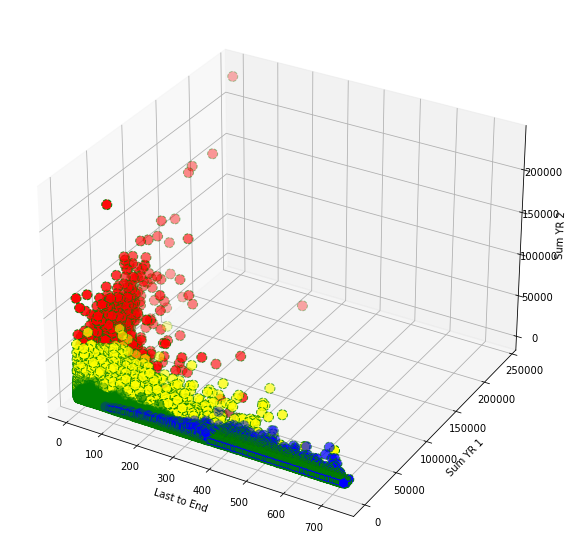

In [83]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Flight['LAST_TO_END'][Flight.clusters == 0], Flight["SUM_YR_1"][Flight.clusters == 0], Flight["SUM_YR_2"][Flight.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(Flight['LAST_TO_END'][Flight.clusters == 1], Flight["SUM_YR_1"][Flight.clusters == 1], Flight["SUM_YR_2"][Flight.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(Flight['LAST_TO_END'][Flight.clusters == 2], Flight["SUM_YR_1"][Flight.clusters == 2], Flight["SUM_YR_2"][Flight.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(Flight['LAST_TO_END'][Flight.clusters == 3], Flight["SUM_YR_1"][Flight.clusters == 3], Flight["SUM_YR_2"][Flight.clusters == 3], c='brown', s=100, edgecolor='green',linestyle='--')
ax.scatter(Flight['LAST_TO_END'][Flight.clusters == 4], Flight["SUM_YR_1"][Flight.clusters == 4], Flight["SUM_YR_2"][Flight.clusters == 4], c='Yellow', s=100, edgecolor='green',linestyle='--')

plt.xlabel("Last to End")
plt.ylabel("Sum YR 1")
ax.set_zlabel('Sum YR 2')
plt.show()

### Dimensional Reduction PCA

In [81]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(Flight_std)
pcs = pca.transform(Flight_std)

Flight_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
Flight_pca['clusters'] = Flight['clusters']
Flight_pca.head()

,PC 1,PC 2,clusters
0,63.949481,15.820031,1
1,44.020657,11.707361,1
2,40.880318,10.711056,1
3,30.745097,8.285891,1
4,37.498674,9.785693,1


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

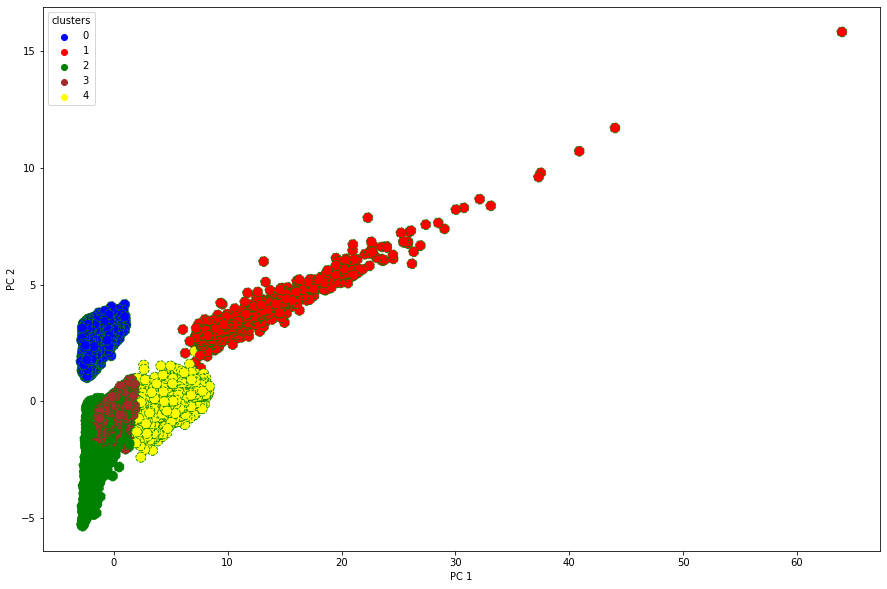

In [82]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=Flight_pca,
    palette=['blue','red','green','brown','yellow'],
    s=100,
    ax=ax
)

 - Displayed in the figures above that the clustering is pretty accurate. The gap and distance for each cluster are quite distinc, albeit for third (green) and foruth (brown) which are quite overlapping with each other a little bit. The fourth cluster serves as a transition between third cluster (green) and fifth (yellow) one. Other than that this K means clustering is pretty accurate.